<a href="https://colab.research.google.com/github/OptimusJet/OptimusJet/blob/main/main_PANDAS2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
SalesData = xl.parse("Orders")

In [ ]:
JustPaper = SalesData.loc[SalesData['Sub-Category']=='Paper']
print(JustPaper)

      Row ID        Order ID Order Date  ... Quantity Discount   Profit
16      8032  CA-2017-158806 2017-01-07  ...        5      0.2   9.0720
28      1026  CA-2017-126529 2017-01-11  ...        3      0.2   5.4432
29      1027  CA-2017-126529 2017-01-11  ...        3      0.2  20.5764
32      7269  CA-2017-133368 2017-01-14  ...        2      0.2  32.4684
39      3743  CA-2017-137848 2017-01-15  ...        9      0.0  28.8576
...      ...             ...        ...  ...      ...      ...      ...
9948    7854  CA-2020-144890 2020-12-25  ...        2      0.0   4.8804
9952    7100  CA-2020-124933 2020-12-26  ...        6      0.0  99.9408
9958    1094  CA-2020-165085 2020-12-27  ...        5      0.0  14.1610
9964    4810  CA-2020-151589 2020-12-27  ...        4      0.0  91.9508
9978    6009  CA-2020-135580 2020-12-30  ...        3      0.0  31.5192

[1370 rows x 21 columns]


In [ ]:
JustPaperYears = JustPaper.copy()
JustPaperYears['Year'] = JustPaperYears['Order Date'].dt.year
print(JustPaperYears.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')


In [ ]:
PaperSegment = JustPaper[['Segment','Profit','Sales']]
SegTotalProfSales = PaperSegment.groupby(by='Segment').sum().sort_values(by='Profit')
print(SegTotalProfSales)

                 Profit      Sales
Segment                           
Home Office   8157.3789  18271.708
Corporate    10361.5468  23883.130
Consumer     15534.6436  36324.368


In [ ]:
JustPaper = SalesData.loc[SalesData['Sub-Category']=='Paper']
RegJustPaperDiscount = JustPaper[['Region','Discount']].groupby(by='Region').mean()
print(RegJustPaperDiscount)

         Discount
Region           
Central  0.128972
East     0.064550
South    0.102262
West     0.031556


In [ ]:
JustPaper = SalesData.loc[SalesData['Sub-Category']=='Paper']
RegJustPaperDiscount1 = JustPaper[['Segment','Discount']].groupby(by='Segment').mean()
print(RegJustPaperDiscount)

         Discount
Region           
Central  0.128972
East     0.064550
South    0.102262
West     0.031556


In [ ]:
PaperRegion = JustPaper[['Region','Profit','Sales']]
SegTotalProfSales = PaperRegion.groupby(by='Region').sum().sort_values(by='Profit')
print(SegTotalProfSales)

             Profit      Sales
Region                        
South     5947.0614  14150.984
Central   6971.9005  17491.902
East      9015.3710  20172.602
West     12119.2364  26663.718


In [ ]:
Regions = JustPaper.Region.unique()
PaperSegRegion = JustPaper[['Segment','Region','Sales','Discount']]
for region in Regions:
  PaperSegment = PaperSegRegion.loc[PaperSegRegion['Region']==region]
  PaperSegmentProfSales = PaperSegment.groupby(by='Segment').agg({'Sales':'sum','Discount':'mean'}).sort_values('Sales')
  print(' Total Sales and Average Discount of Paper for each customer segment in ' +  region  + ':')
  print(PaperSegmentProfSales)
  print('_'*40)

 Total Sales and Average Discount of Paper for each customer segment in Central:
                Sales  Discount
Segment                        
Home Office  3975.880  0.114815
Corporate    5952.002  0.137500
Consumer     7564.020  0.127742
________________________________________
 Total Sales and Average Discount of Paper for each customer segment in East:
                Sales  Discount
Segment                        
Home Office  5536.218  0.085393
Corporate    5975.116  0.062745
Consumer     8661.268  0.055615
________________________________________
 Total Sales and Average Discount of Paper for each customer segment in South:
                Sales  Discount
Segment                        
Home Office  3202.390  0.086486
Corporate    3345.322  0.092308
Consumer     7603.272  0.112605
________________________________________
 Total Sales and Average Discount of Paper for each customer segment in West:
                 Sales  Discount
Segment                         
Home Office   5

In [ ]:
JustPaper = SalesData.loc[SalesData['Sub-Category']=='Paper']
JustPaperYear = JustPaper.copy()
JustPaperYear['Year']=JustPaperYear['Order Date'].dt.year
Years = JustPaperYear.Year.unique()
RegJustPaperYear = JustPaperYear[['Region','Year','Discount']]
for year in Years:
 OneYear = RegJustPaperYear.loc[RegJustPaperYear['Year']==year]
 NoYear = OneYear[['Region','Discount']]
 YearlyRegDiscount = NoYear.groupby(by='Region').mean()
 print('\nRegional Paper discounts for the year:'+ str(year))
 print(YearlyRegDiscount)
 print('*'*40)


Regional Paper discounts for the year:2017
         Discount
Region           
Central  0.128261
East     0.068132
South    0.094915
West     0.022581
****************************************

Regional Paper discounts for the year:2018
         Discount
Region           
Central  0.130275
East     0.070073
South    0.126471
West     0.027586
****************************************

Regional Paper discounts for the year:2019
         Discount
Region           
Central  0.140625
East     0.068750
South    0.089655
West     0.043678
****************************************

Regional Paper discounts for the year:2020
         Discount
Region           
Central  0.114286
East     0.048837
South    0.088889
West     0.038298
****************************************


   Year      Profit      Sales
0  2017   9071.5345  20661.894
1  2018  12040.8434  27694.718
2  2019   6371.0214  14834.956
3  2020   6570.1700  15287.638
****************************************


AttributeError: ignored

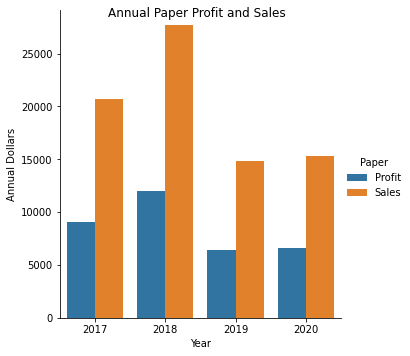

In [ ]:
JustPaper = SalesData.loc[SalesData['Sub-Category']=='Paper']
PaperSalesYear = JustPaper.copy()
PaperSalesYear['Year']= PaperSalesYear['Order Date'].dt.year
PaperSalesProf = PaperSalesYear[['Year','Profit','Sales']].groupby(by='Year').sum()
PaperSalesProf = PaperSalesProf.reset_index()
print(PaperSalesProf)
print('*'*40)
PaperSalesProfGraph = pd.melt(PaperSalesProf, id_vars='Year', var_name='Paper', value_name='Annual Dollars')
CatPlot1 = sns.catplot(x='Year',y='Annual Dollars',hue='Paper', data = PaperSalesProfGraph, kind = 'bar')
CatPlot1.fig.suptitle('Annual Paper Profit and Sales')
plt.shot()

In [ ]:
JustPaper = SalesData.loc[SalesData['Sub-Category']=='Paper']
PaperProf = JustPaper[['Product Name','Profit']].groupby('Product Name').sum()
NegPaper = PaperProf[PaperProf['Profit']<0.0]
display(NegPaper)

,Profit
Product Name,


In [ ]:
PaperDiscount = JustPaper["Sales"].mean()
print(PaperDiscount)

57.28409197080295


In [ ]:
PaperDiscount = JustPaper["Discount"].mean()
print(PaperDiscount)

0.07489051094890578


In [ ]:
PaperProductDiscount = JustPaper[["Product Name", "Discount"]].groupby(by="Product Name").mean().sort_values(by="Discount", ascending = False)
print(PaperProductDiscount.head(10))

                                                    Discount
Product Name                                                
Xerox 1921                                               0.2
Things To Do Today Spiral Book                           0.2
Xerox 1985                                               0.2
Xerox 1989                                               0.2
Snap-A-Way Black Print Carbonless Speed Message...       0.2
Xerox 1938                                               0.2
Xerox 1932                                               0.2
Black Print Carbonless 8 1/2" x 8 1/4" Rapid Me...       0.2
Xerox 1955                                               0.2
Xerox 1901                                               0.2


In [ ]:
SubCatProfits = SalesData[['Sub-Category','Profit','Sales']]
print(SubCatProfits)

     Sub-Category    Profit    Sales
0       Bookcases   38.2668  173.940
1          Phones   67.2742  231.980
2         Storage   28.6150  114.460
3     Accessories   -5.2640   30.080
4     Accessories   -6.2100  165.600
...           ...       ...      ...
9989      Binders  167.8080  364.800
9990      Storage  -26.7204  152.688
9991    Fasteners    0.5668    3.488
9992     Supplies   -1.3248    5.888
9993      Binders   52.3800  116.400

[9994 rows x 3 columns]
